**Genetic Algoritn Implementation :**
<br> Travelling salesman problem

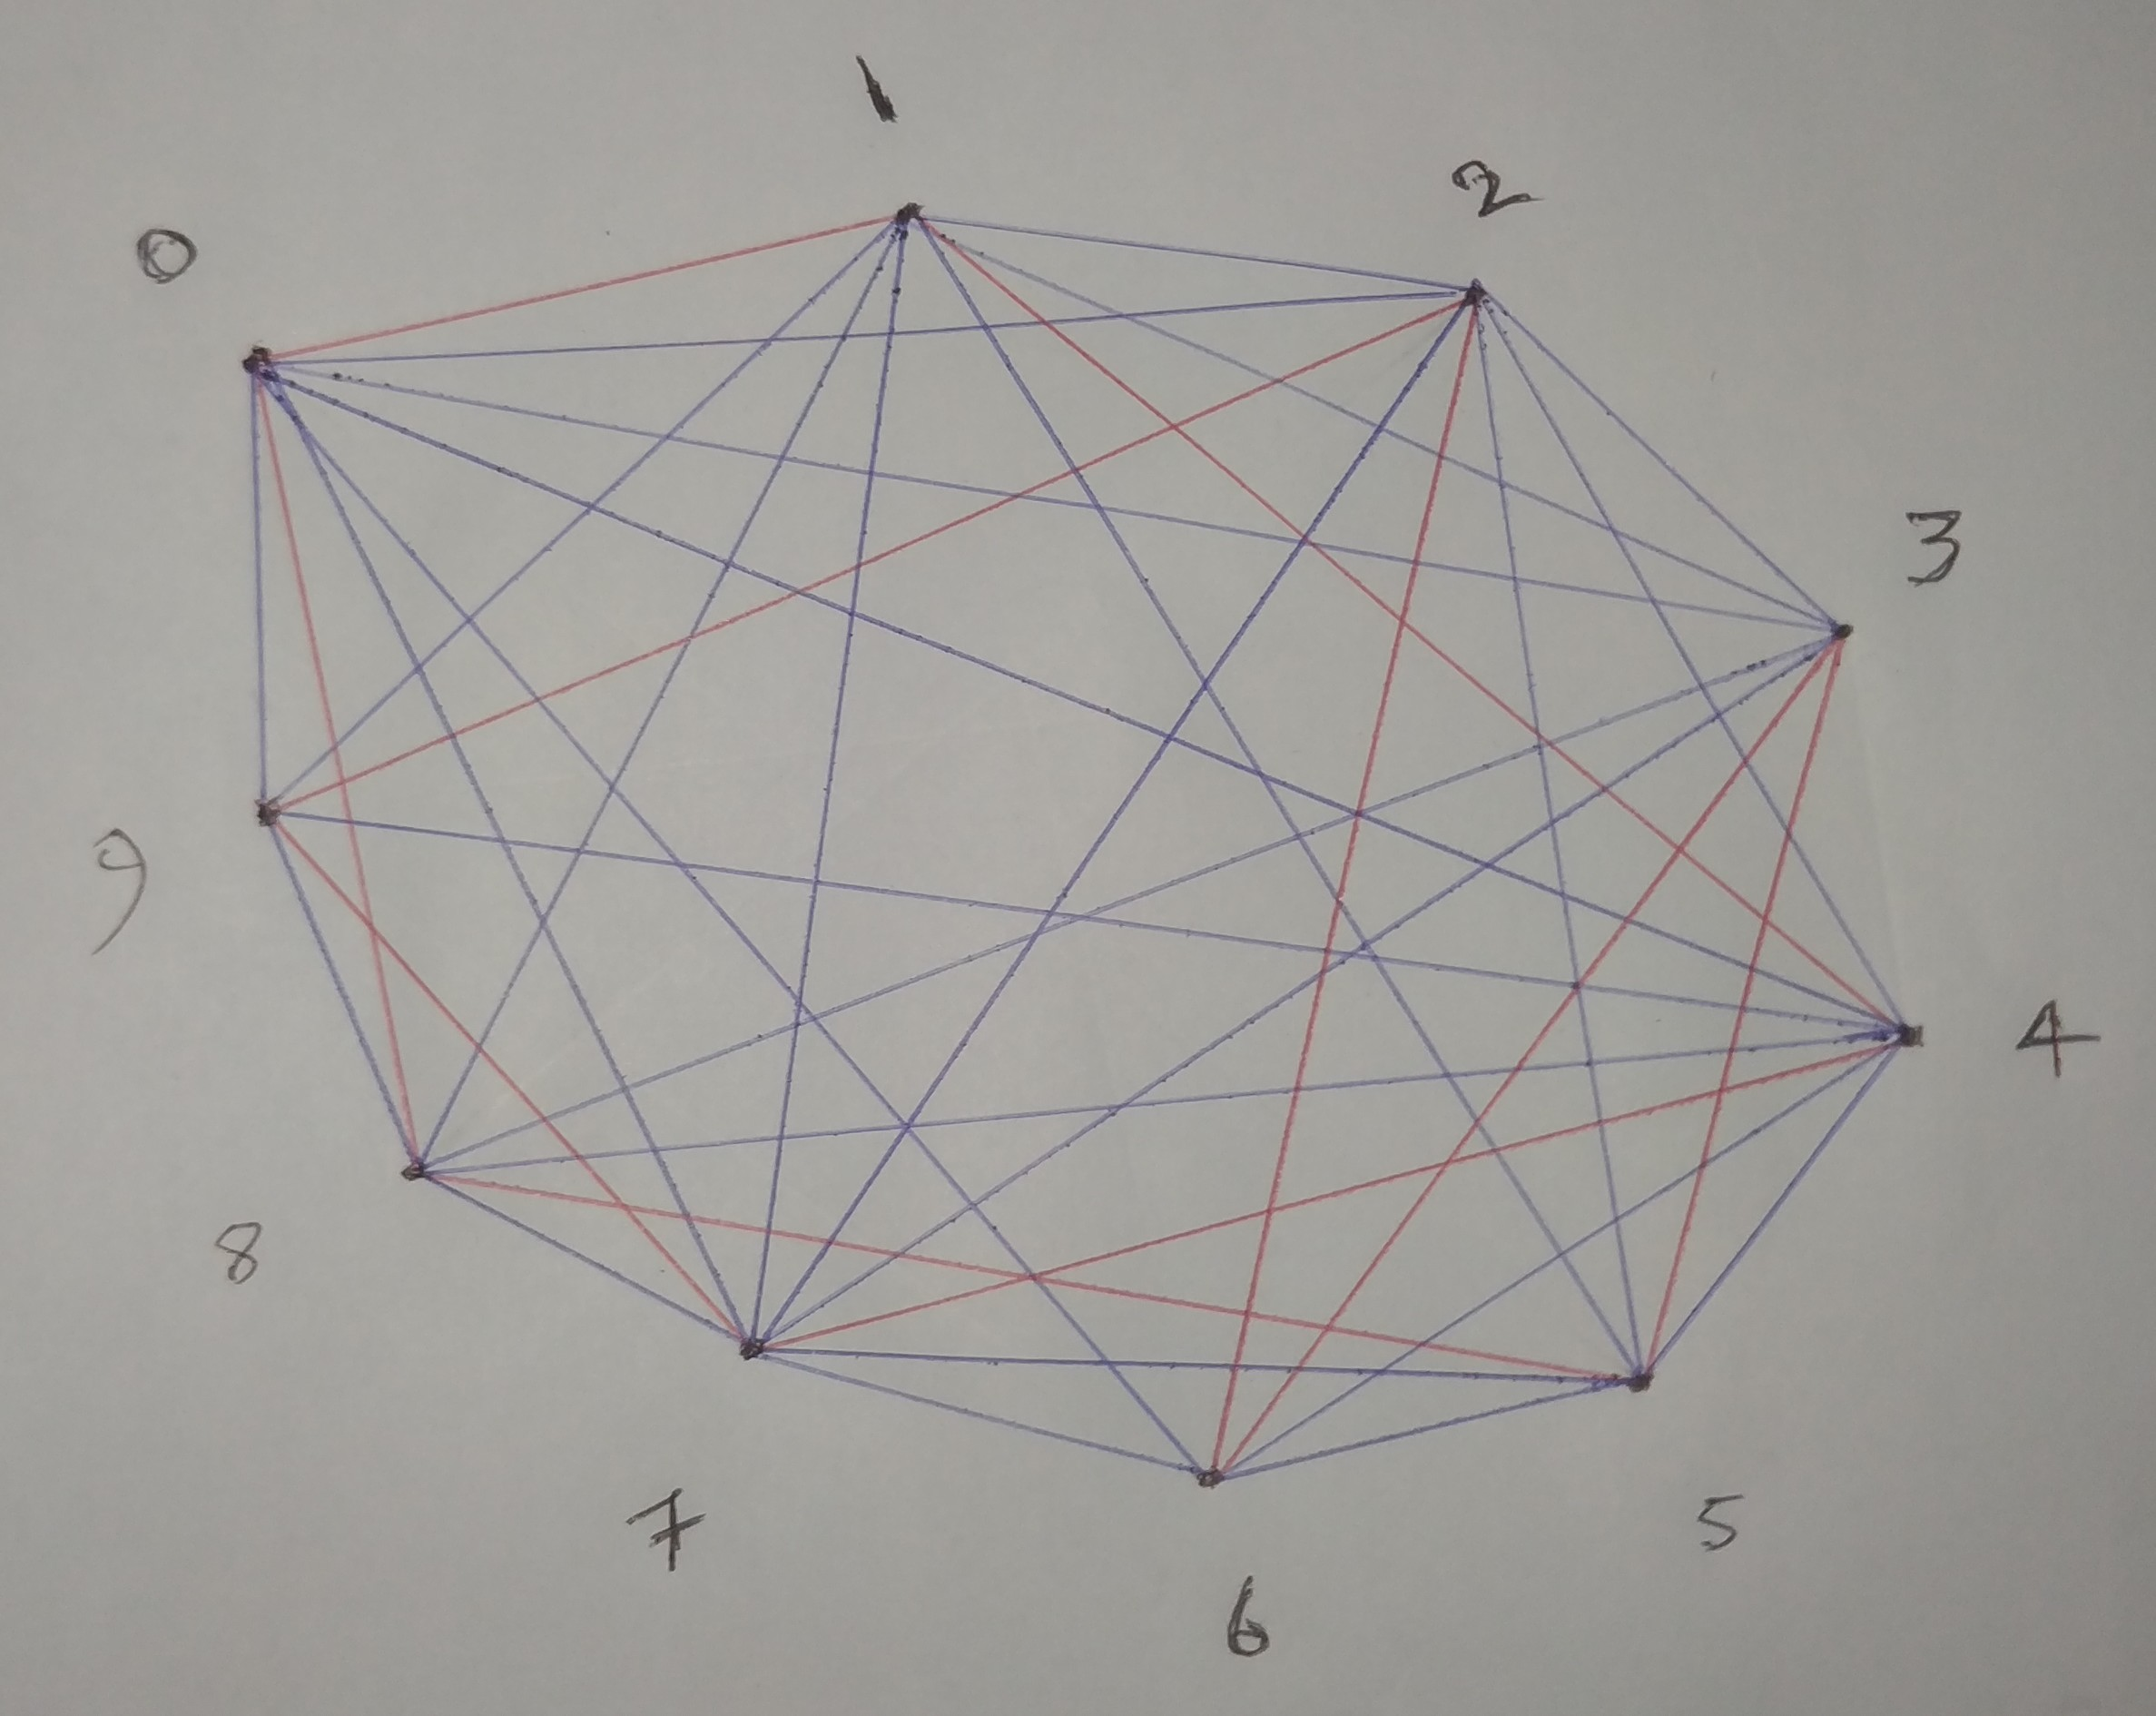


1. Here the red path is the minimum cost path with cost 1
2. All the blue paths have cost more than one and selected randomly from 3 to 9.
3. There is also some cities where there is actually no path between them, I have set the cost 200 for them so they wont be selected.

In [33]:
# Import Modules
import numpy as np
from numpy.random import randint
from numpy.random import rand
import matplotlib.pyplot as plt
import random

In [34]:
# Set the cities
cities = [0,1,2,3,4,5,6,7,8,9]

In [35]:
m = 200     # Cost of imaginary path 

# Cost Matrix
# cost[i][j] = cost of path (i->j) = cost of path (j->i) = cost[j][i]
cost_matrix = [
    [0,1,4,7,5,m,7,4,1,7],
    [1,0,9,7,1,4,m,7,6,8],
    [7,6,0,3,5,8,1,6,m,1],
    [8,5,8,0,m,1,1,7,6,m],
    [7,1,5,m,0,6,7,1,9,7],
    [m,5,4,1,5,0,6,8,1,6],
    [4,m,1,1,8,9,0,7,6,m],
    [9,6,2,3,1,5,6,0,8,1],
    [1,8,m,7,6,8,6,7,0,5],
    [5,7,1,m,6,5,m,1,4,0]]

In [36]:
# Objective Function
def obj(path):
    total_cost = 0
    for i in range(len(path)-1):
        total_cost = total_cost + cost_matrix[path[i]][path[i+1]]
    total_cost = total_cost + cost_matrix[path[i+1]][path[0]]
    return -total_cost


In [37]:
# Scores
def scores(list):
    return [obj(i) for i in list]


In [38]:
# Set no of parents
no_parent = 12

In [39]:
# Decode Chromosome
def decode(chromosome):
    for i in chromosome:
        print(i,'-->', end=' ')
    print(chromosome[0])

In [40]:
# Mating Pool by Roulette Selection
def pool(parent):
    p_roulette = [(scores(parent)[i]/sum(scores(parent)))
                  for i in range(no_parent)]
    w = [(1/i) for i in p_roulette]
    s = random.choices(parent, weights=w, k=int(no_parent/2))
    return s


In [41]:
# Reproducton
def crossover(parent1, parent2):
    child1, child2 = parent1.copy(), parent2.copy()
    if rand() < 0.8:
        child1 = []
        child2 = []        
        cross_point = randint(len(parent1))
        child1 = parent1[:cross_point]
        for i in parent2:
            if i not in child1:
                child1.append(i)

        cross_point = randint(len(parent2))
        child2 = parent2[:cross_point]
        for i in parent1:
            if i not in child2:
                child2.append(i)

    return [child1, child2]

In [42]:
# Mutation
def mutation(chromosome):
    if rand() < 0.1:
        random_index1 = randint(len(chromosome))
        random_index2 = randint(len(chromosome))
        chromosome[random_index1],chromosome[random_index2] = chromosome[random_index2],chromosome[random_index1]


In [43]:
# Elitsm
def Elitsm(children, grand_parent):
    child_scores = [obj(i) for i in children]
    grand_parent_scores = [obj(i) for i in grand_parent]
    if max(child_scores) < min(grand_parent_scores):
        children[child_scores.index(max(
            child_scores))] = grand_parent[grand_parent_scores.index(min(grand_parent_scores))]
    return children


In [44]:
# select an item except a specific value
def choice_excluding(list, exception):
    possible_choices = [v for v in list if v != exception]
    return np.random.choice(possible_choices)


In [45]:
# Initial Population
grand_parent = [random.sample(cities, len(cities)) for i in range(no_parent)]

# Set Iteration
iter = 100000


In [46]:
# Genetic Algorithm
def genetic_algorithm(grand_parent, iter):
    parent = grand_parent
    best_chromosome, best_score = parent[0], obj(parent[0])
    for gen in range(iter):
        for i in range(no_parent):
            if scores(parent)[i] > best_score:
                best_chromosome, best_score = parent[i], scores(parent)[i]
                print('New best at - generation', gen, '\n', 'chromosome -',
                      parent[i], '\t', 'score -', scores(parent)[i], '\n')
        fittest = pool(parent)
        children = []
        for i in range(len(fittest)):
            not_i = choice_excluding(range(len(fittest)), i)
            parent1, parent2 = fittest[i], fittest[not_i]
            for j in crossover(parent1, parent2):
                mutation(j)
                children.append(j)
        Elitsm(children, grand_parent)
        parent = children
        if best_score == -10:   # I did this becauce I knew the minimum cost is 10... if you dont know just delete this part and iterate as you want and get the final result
            break
    return best_chromosome

In [47]:
# Do the Magic
best_chromosome = genetic_algorithm(grand_parent, iter)

New best at - generation 0 
 chromosome - [3, 5, 9, 0, 6, 8, 2, 4, 7, 1] 	 score - -244 

New best at - generation 0 
 chromosome - [9, 1, 0, 5, 8, 3, 2, 6, 4, 7] 	 score - -235 

New best at - generation 0 
 chromosome - [3, 6, 9, 5, 4, 8, 0, 1, 7, 2] 	 score - -234 

New best at - generation 1 
 chromosome - [9, 1, 0, 8, 3, 6, 5, 2, 4, 7] 	 score - -37 

New best at - generation 3 
 chromosome - [9, 1, 0, 8, 3, 6, 5, 4, 7, 2] 	 score - -35 

New best at - generation 6 
 chromosome - [9, 2, 3, 6, 5, 1, 0, 8, 4, 7] 	 score - -29 

New best at - generation 8 
 chromosome - [9, 5, 3, 6, 2, 1, 0, 8, 4, 7] 	 score - -24 

New best at - generation 25 
 chromosome - [9, 2, 3, 6, 0, 1, 5, 8, 4, 7] 	 score - -23 

New best at - generation 61 
 chromosome - [9, 2, 6, 3, 5, 8, 1, 0, 4, 7] 	 score - -21 

New best at - generation 249 
 chromosome - [9, 2, 6, 3, 5, 8, 4, 1, 0, 7] 	 score - -18 

New best at - generation 6228 
 chromosome - [6, 3, 5, 8, 0, 1, 4, 7, 9, 2] 	 score - -10 



In [48]:
# Print the Minimum Cost Path
print('\n The minimum cost path is --')
decode(best_chromosome)


 The minimum cost path is --
6 --> 3 --> 5 --> 8 --> 0 --> 1 --> 4 --> 7 --> 9 --> 2 --> 6
